# Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load dataset

In [3]:
df = pd.read_csv('inventory-dataset.csv')
df

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeePhone,...,CustomerName,CustomerAddress,CustomerCreditLimit,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Summer Payne,summer.payne@example.com,5.151238e+09,...,Flor Stone,2904 S Salina St,5000,flor.stone@raytheon.com,1.317123e+10,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Rose Stephens,rose.stephens@example.com,5.151238e+09,...,Lavera Emerson,"5344 Haverford Ave, Philadelphia",5000,lavera.emerson@plainsallamerican.com,1.317123e+10,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Annabelle Dunn,annabelle.dunn@example.com,5.151234e+09,...,Fern Head,"1795 Wu Meng, Muang Chonburi",1200,fern.head@usfoods.com,1.812123e+10,Canceled,3-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Tommy Bailey,tommy.bailey@example.com,5.151235e+09,...,Shyla Ortiz,"Walpurgisstr 69, Munich",2400,shyla.ortiz@abbvie.com,1.317123e+10,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Blake Cooper,blake.cooper@example.com,5.151235e+09,...,Jeni Levy,"Via Frenzy 6903, Roma",1200,jeni.levy@centene.com,1.812121e+10,Shipped,9-Apr-17,106,109.99,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Veera Abdellah,VeeraAbdellah@gmail.com,8.788092e+09,...,Vega Vincent,4284 Dorigo Ln,4900,VegaVincent@gmail.com,7.878799e+08,Shipped,27-Sep-17,32,725.99,107
396,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Vega Vincent,VegaVincent@gmail.com,6.700990e+09,...,Villanueva Noah,6794 Lake Dr E,5000,VillanuevaNoah@gmail.com,7.858112e+08,Pending,16-Aug-16,66,798.26,118
397,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Villanueva Noah,VillanuevaNoah@gmail.com,7.890991e+09,...,Voldemort Lord,31 Douglas Blvd #950,4000,VoldemortLord@gmail.com,7.892438e+08,Canceled,27-May-16,82,849.99,118
398,Asia,India,Maharashtra,Bombay,490231,1298 Vileparle (E),Bombay,Zima Colleen,ZimaColleen@gmail.com,8.690991e+09,...,Lucy Cechtelar,44 W 4th St,3000,LucyCechtelar@gmail.com,9.649410e+08,Shipped,27-May-17,157,821.99,95


# Step 2: Data Preprocessing

In [4]:
# Display column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionName           400 non-null    object 
 1   CountryName          400 non-null    object 
 2   State                400 non-null    object 
 3   City                 400 non-null    object 
 4   PostalCode           400 non-null    object 
 5   WarehouseAddress     400 non-null    object 
 6   WarehouseName        400 non-null    object 
 7   EmployeeName         400 non-null    object 
 8   EmployeeEmail        400 non-null    object 
 9   EmployeePhone        400 non-null    float64
 10  EmployeeHireDate     400 non-null    object 
 11  EmployeeJobTitle     400 non-null    object 
 12  CategoryName         400 non-null    object 
 13  ProductName          400 non-null    object 
 14  ProductDescription   400 non-null    object 
 15  ProductStandardCost  400 non-null    flo

In [5]:
# Check for missing values
print(df.isnull().sum())

RegionName             0
CountryName            0
State                  0
City                   0
PostalCode             0
WarehouseAddress       0
WarehouseName          0
EmployeeName           0
EmployeeEmail          0
EmployeePhone          0
EmployeeHireDate       0
EmployeeJobTitle       0
CategoryName           0
ProductName            0
ProductDescription     0
ProductStandardCost    0
Profit                 0
ProductListPrice       0
CustomerName           0
CustomerAddress        0
CustomerCreditLimit    0
CustomerEmail          0
CustomerPhone          0
Status                 0
OrderDate              0
OrderItemQuantity      0
PerUnitPrice           0
TotalItemQuantity      0
dtype: int64


In [6]:
# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

In [7]:
# Extract time-based features
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Weekday'] = df['OrderDate'].dt.weekday

In [8]:
# Set ProductListPrice 0 to 20000
df['ProductListPrice'] = df['ProductListPrice'].clip(lower=0, upper=20000)

In [9]:
# Selecting relevant features
features = ['CountryName', 'Year', 'Month', 'Weekday', 'CategoryName', 'ProductStandardCost', 'ProductListPrice',
            'Profit', 'PerUnitPrice', 'CustomerCreditLimit', 'Status', 'TotalItemQuantity']

df = df[features + ['OrderItemQuantity']]

In [10]:
df.head()

,CountryName,Year,Month,Weekday,CategoryName,ProductStandardCost,ProductListPrice,Profit,PerUnitPrice,CustomerCreditLimit,Status,TotalItemQuantity,OrderItemQuantity
0,United States of America,2016,11,3,CPU,2867.51,3410.46,542.95,469.99,5000,Shipped,122,132
1,United States of America,2017,2,0,CPU,2326.27,2774.98,448.71,519.99,5000,Shipped,123,124
2,United States of America,2017,1,1,CPU,2035.18,2660.72,625.54,800.74,1200,Canceled,123,92
3,United States of America,2017,10,6,CPU,2144.40,2554.99,410.59,849.99,2400,Pending,124,128
4,United States of America,2017,4,6,CPU,2012.11,2501.69,489.58,109.99,1200,Shipped,125,106


# Step 3: Exploratory Data Analysis (EDA) & Visualizations

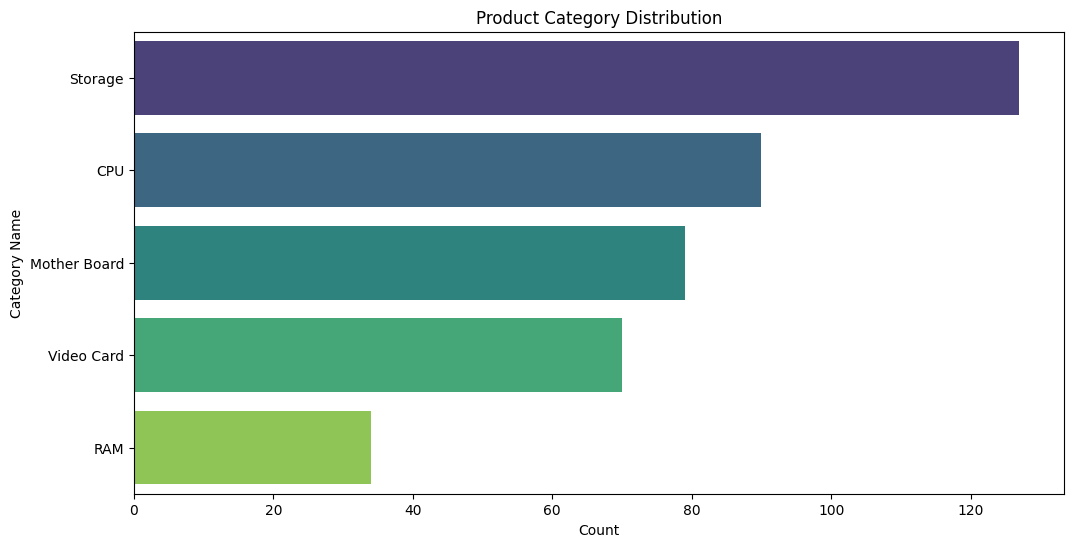

In [11]:
# Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['CategoryName'], order=df['CategoryName'].value_counts().index, palette='viridis')
plt.title("Product Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category Name")
plt.show()

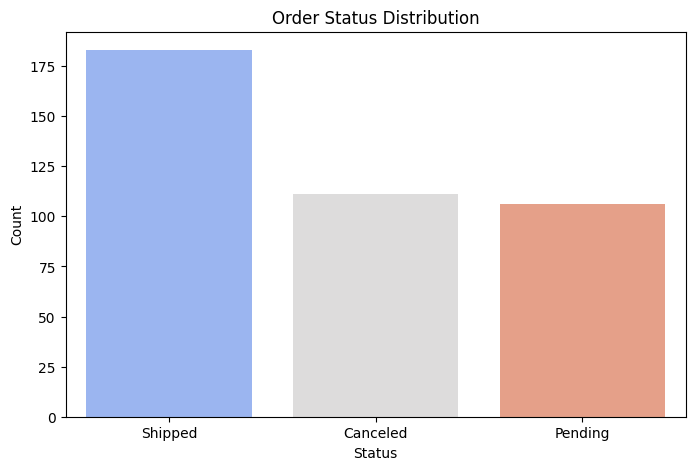

In [12]:
# Order Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Status'], palette='coolwarm')
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

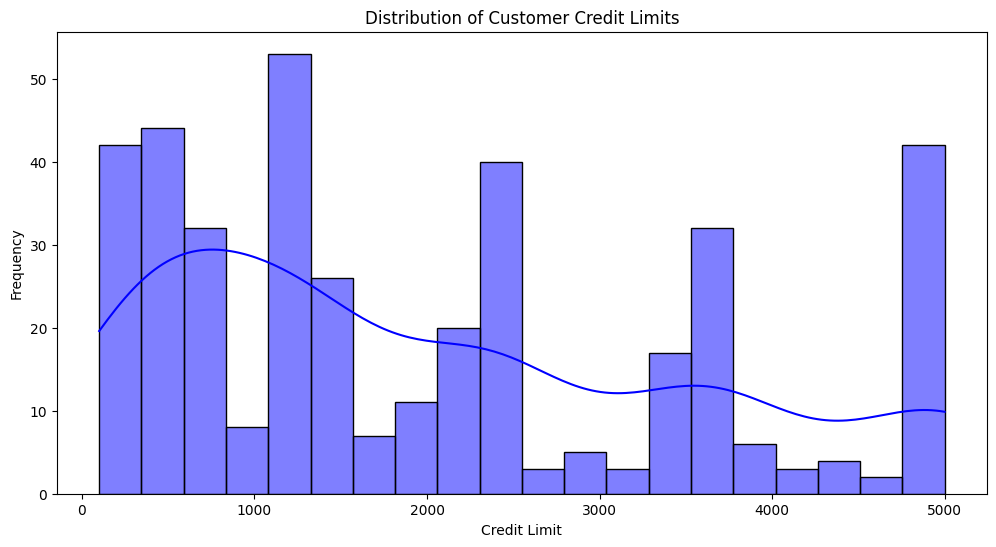

In [13]:
# Customer Credit Limit Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['CustomerCreditLimit'], bins=20, kde=True, color='blue')
plt.title("Distribution of Customer Credit Limits")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

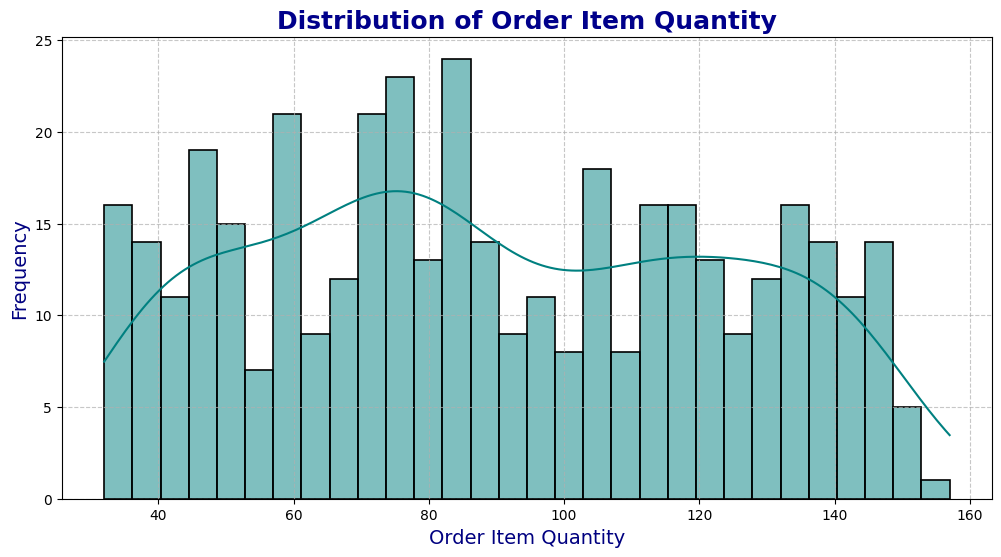

In [14]:
# Distribution of Order Item Quantity
sns.set_palette("Spectral")

plt.figure(figsize=(12, 6))
sns.histplot(df['OrderItemQuantity'], bins=30, kde=True, color='teal', edgecolor='black', linewidth=1.2)
plt.title("Distribution of Order Item Quantity", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Order Item Quantity", fontsize=14, fontweight='medium', color='navy')
plt.ylabel("Frequency", fontsize=14, fontweight='medium', color='navy')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

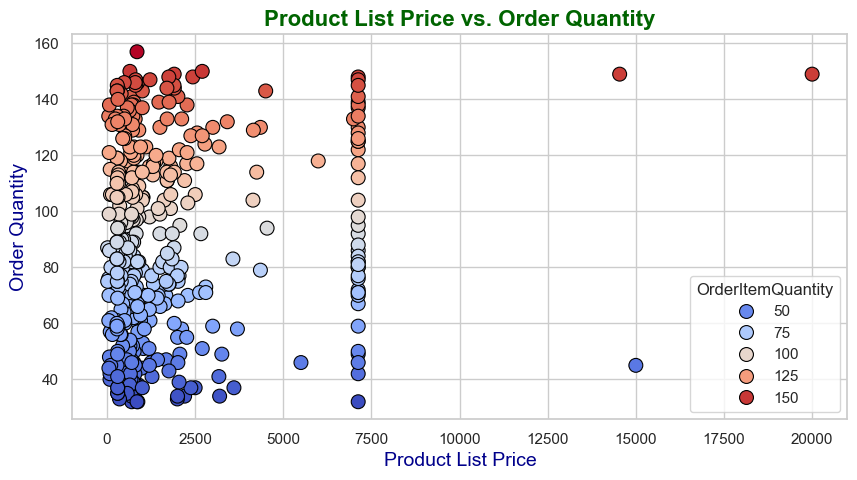

In [15]:
# Relationship between Product List Price and Order Quantity
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['ProductListPrice'], y=df['OrderItemQuantity'], hue=df['OrderItemQuantity'], palette='coolwarm', edgecolor='black', s=100)
plt.title("Product List Price vs. Order Quantity", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Product List Price", fontsize=14, fontweight='medium', color='darkblue')
plt.ylabel("Order Quantity", fontsize=14, fontweight='medium', color='darkblue')

plt.show()

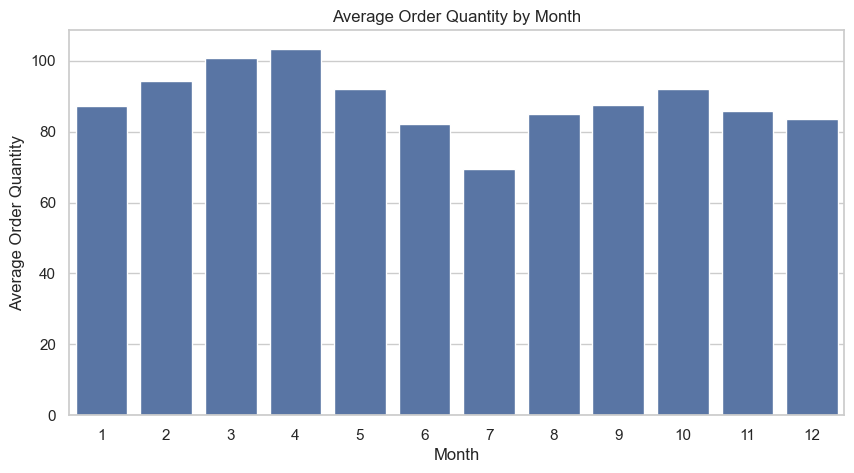

In [16]:
# Order Quantity by Month (Seasonality Check)
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Month'], y=df['OrderItemQuantity'], estimator=np.mean, ci=None)
plt.title("Average Order Quantity by Month")
plt.xlabel("Month")
plt.ylabel("Average Order Quantity")
plt.show()

# Step 4: Data Encoding

In [17]:
# Encode categorical variables
encoder = LabelEncoder()
df['CategoryName'] = encoder.fit_transform(df['CategoryName'])
df['Status'] = encoder.fit_transform(df['Status'])
df['CountryName'] = encoder.fit_transform(df['CountryName'])

In [18]:
# Normalize numeric features
scaler = StandardScaler()
numeric_cols = ['ProductStandardCost', 'ProductListPrice', 'Profit', 'PerUnitPrice', 'CustomerCreditLimit', 'TotalItemQuantity']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [19]:
df.head()

,CountryName,Year,Month,Weekday,CategoryName,ProductStandardCost,ProductListPrice,Profit,PerUnitPrice,CustomerCreditLimit,Status,TotalItemQuantity,OrderItemQuantity
0,5,2016,11,3,0,0.245737,0.640668,1.390572,-0.523357,1.935562,2,-0.025165,132
1,5,2017,2,0,0,0.119651,0.378596,1.019549,-0.452492,1.935562,2,-0.010319,124
2,5,2017,1,1,0,0.051839,0.331475,1.715728,-0.054585,-0.543935,0,-0.010319,92
3,5,2017,10,6,0,0.077283,0.287872,0.869471,0.015217,0.239064,1,0.004528,128
4,5,2017,4,6,0,0.046465,0.265891,1.180454,-1.033586,-0.543935,2,0.019375,106


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CountryName          400 non-null    int32  
 1   Year                 400 non-null    int32  
 2   Month                400 non-null    int32  
 3   Weekday              400 non-null    int32  
 4   CategoryName         400 non-null    int32  
 5   ProductStandardCost  400 non-null    float64
 6   ProductListPrice     400 non-null    float64
 7   Profit               400 non-null    float64
 8   PerUnitPrice         400 non-null    float64
 9   CustomerCreditLimit  400 non-null    float64
 10  Status               400 non-null    int32  
 11  TotalItemQuantity    400 non-null    float64
 12  OrderItemQuantity    400 non-null    int64  
dtypes: float64(6), int32(6), int64(1)
memory usage: 31.4 KB


In [20]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        CountryName         Year       Month     Weekday  CategoryName  \
count   400.000000   400.000000  400.000000  400.000000    400.000000   
mean      3.332500  2016.237500    6.642500    2.402500      2.020000   
std       1.831757     0.766526    3.634242    1.795425      1.455988   
min       0.000000  2013.000000    1.000000    0.000000      0.000000   
25%       2.000000  2016.000000    3.000000    1.000000      1.000000   
50%       4.000000  2016.000000    6.000000    2.000000      2.000000   
75%       5.000000  2017.000000   10.000000    4.000000      3.000000   
max       5.000000  2017.000000   12.000000    6.000000      4.000000   

       ProductStandardCost  ProductListPrice        Profit  PerUnitPrice  \
count         4.000000e+02      4.000000e+02  4.000000e+02  4.000000e+02   
mean          1.776357e-17     -3.552714e-17 -8.881784e-17 -1.554312e-17   
std           1.001252e+00      1.001252e+00  1.001252e+00  1.001252e+00   
min          -4.

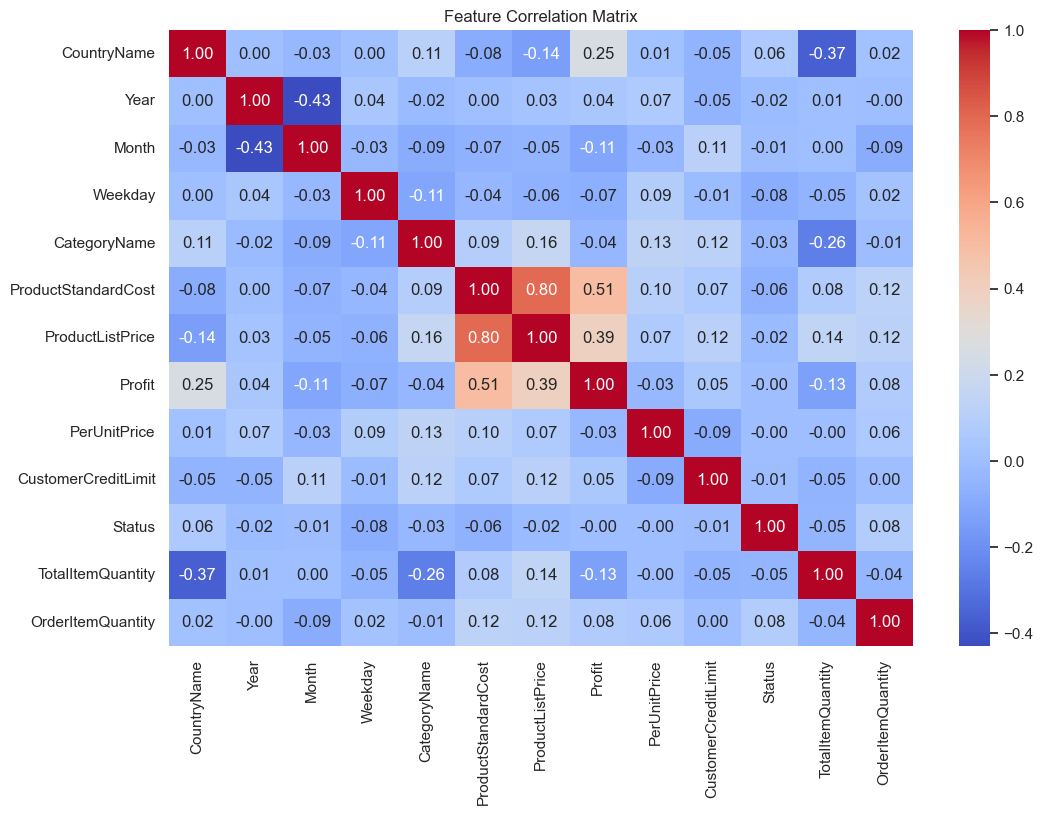

In [24]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Step 5: Split dataset

In [25]:
X = df.drop(columns=['OrderItemQuantity'])
y = df['OrderItemQuantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,CountryName,Year,Month,Weekday,CategoryName,ProductStandardCost,ProductListPrice,Profit,PerUnitPrice,CustomerCreditLimit,Status,TotalItemQuantity
3,5,2017,10,6,0,0.077283,0.287872,0.869471,0.015217,0.239064,1,0.004528
18,5,2016,12,2,0,-0.114041,-0.002866,1.327304,0.086082,-0.870184,0,-0.040012
202,1,2016,10,5,1,-0.357345,-0.601909,-0.279659,-1.094671,-0.543935,0,1.088346
250,0,2017,1,1,3,-0.153523,-0.147210,0.616558,0.511273,1.935562,0,0.449933
274,4,2017,9,1,3,-0.411748,-0.741066,-0.688713,2.431716,-1.000684,2,0.821103
...,...,...,...,...,...,...,...,...,...,...,...,...
71,5,2016,6,3,4,0.420836,0.941118,1.299667,-0.681386,-0.413435,2,-1.836476
106,5,2017,2,0,4,-0.293769,-0.448262,0.112702,-0.326409,0.304314,2,-1.702855
270,4,2017,3,3,3,1.237243,2.171991,-0.747020,1.503384,-0.935434,0,0.806256
348,2,2016,12,3,3,1.237243,2.171991,-0.747020,0.893902,0.761064,0,1.325895


In [27]:
X_test

,CountryName,Year,Month,Weekday,CategoryName,ProductStandardCost,ProductListPrice,Profit,PerUnitPrice,CustomerCreditLimit,Status,TotalItemQuantity
209,1,2016,10,6,1,-0.363239,-0.619824,-0.351076,-0.177536,-1.131184,0,-0.411182
280,4,2017,2,0,3,-0.393871,-0.703537,-0.632572,-0.770350,0.173814,0,0.880490
33,5,2017,9,2,0,-0.212103,-0.240000,0.720731,-0.375958,0.304314,1,0.880490
210,1,2016,10,6,1,-0.350988,-0.621470,-0.573832,-0.709024,-1.131184,2,-0.411182
93,5,2015,10,1,4,-0.249199,-0.409500,-0.270486,1.226131,0.239064,2,-1.361378
...,...,...,...,...,...,...,...,...,...,...,...,...
246,0,2015,4,3,3,-0.407916,-0.731325,-0.660485,-1.033586,-0.413435,0,0.375699
227,0,2016,6,0,1,-0.371094,-0.646296,-0.471037,-1.114854,-0.870184,2,-0.129093
369,3,2016,12,3,1,-0.363495,-0.643850,-0.576115,-0.276732,-1.131184,1,1.281354
176,5,2016,11,1,3,-0.317358,-0.501461,0.003489,-1.127127,-1.065934,2,-0.247868


In [28]:
y_train

3      128
18      79
202     77
250     80
274     99
      ... 
71     104
106    137
270    125
348     77
102     63
Name: OrderItemQuantity, Length: 320, dtype: int64

In [29]:
y_test

209     33
280    106
33      41
210    131
93     146
      ... 
246     42
227    143
369    112
176    136
289    118
Name: OrderItemQuantity, Length: 80, dtype: int64

# Step 6: Model Training & Prediction

### ARIMA Model

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def train_arima(y_train):
    model = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,12))
    results = model.fit()
    return results

arima_model = train_arima(y_train)
print("ARIMA Model Trained.")

C:\Users\Jisan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Jisan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Model Trained.


In [31]:
y_pred_arima = arima_model.forecast(len(y_test))
y_pred_arima

C:\Users\Jisan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


320    102.933682
321     80.902735
322     94.889933
323     89.096518
324     73.967876
          ...    
395     90.201110
396     75.102760
397     98.430768
398     99.055976
399     88.445930
Name: predicted_mean, Length: 80, dtype: float64

In [32]:
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  OrderItemQuantity   No. Observations:                  320
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1532.199
Date:                            Sat, 15 Mar 2025   AIC                           3074.398
Time:                                    17:52:06   BIC                           3093.033
Sample:                                         0   HQIC                          3081.850
                                            - 320                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0393      0.058     -0.677      0.499      -0.153       0.075
ma.L1         -0.9625      0.022   

### XGBoost Model

In [33]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Model Trained.")

XGBoost Model Trained.


In [34]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([ 83.66432 ,  62.56275 ,  95.18427 , 126.592545, 126.47003 ,
        62.283733,  93.9257  , 120.564064,  84.336426,  84.19416 ,
        92.14005 ,  79.17374 ,  86.022194, 110.88782 , 107.137245,
        78.18318 , 114.83537 ,  87.87245 , 114.21131 , 119.56007 ,
       113.245125, 110.44216 , 100.8779  , 118.338165, 103.311775,
       112.18957 , 117.136925,  94.90058 ,  92.94638 , 137.21645 ,
       106.33401 ,  93.32303 ,  86.73068 ,  90.22365 , 118.599045,
        78.999405,  97.02844 ,  99.9947  ,  89.97169 ,  77.59648 ,
        96.732666, 101.769684, 112.694695,  84.5661  ,  87.549255,
        84.35856 ,  91.22141 , 104.73045 , 112.86207 ,  78.04192 ,
        83.92668 ,  91.46162 ,  86.48019 ,  96.43376 ,  52.35499 ,
        67.27625 , 111.93259 ,  66.7201  , 104.25562 ,  92.68261 ,
        82.21086 ,  84.84518 ,  90.15965 , 108.13098 , 101.642334,
        78.73754 ,  88.56412 ,  75.267204,  87.48102 , 119.80882 ,
       114.65711 ,  71.99125 ,  76.8638  ,  85.614555, 112.196

### LSTM Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=16)
print("LSTM Model Trained.")

Epoch 1/10
20/20 [==============================] - 3s 9ms/step - loss: 8265.6201
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 6445.1152
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 4658.3262
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 3271.1069
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 2270.2249
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 1611.2080
Epoch 7/10
20/20 [==============================] - 0s 11ms/step - loss: 1280.5793
Epoch 8/10
20/20 [==============================] - 0s 11ms/step - loss: 1138.0071
Epoch 9/10
20/20 [==============================] - 0s 11ms/step - loss: 1104.2653
Epoch 10/10
20/20 [==============================] - 0s 11ms/step - loss: 1104.6147
LSTM Model Trained.


In [36]:
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
y_pred_lstm

3/3 [==============================] - 1s 6ms/step


array([88.36239 , 88.364174, 88.364395, 88.362755, 88.36131 , 88.361046,
       88.3644  , 88.3605  , 88.36277 , 88.361374, 88.36381 , 88.36482 ,
       88.36139 , 88.36131 , 88.36311 , 88.3647  , 88.36434 , 88.364975,
       88.36261 , 88.36288 , 88.36099 , 88.363396, 88.36271 , 88.36406 ,
       88.363434, 88.36319 , 88.36038 , 88.36302 , 88.36419 , 88.36029 ,
       88.36311 , 88.36424 , 88.3642  , 88.36142 , 88.362976, 88.3606  ,
       88.360756, 88.36418 , 88.36327 , 88.36341 , 88.36501 , 88.36139 ,
       88.36134 , 88.3633  , 88.36078 , 88.36662 , 88.3631  , 88.36324 ,
       88.363655, 88.36265 , 88.36108 , 88.36394 , 88.36443 , 88.36018 ,
       88.36492 , 88.364655, 88.36293 , 88.364075, 88.36374 , 88.3628  ,
       88.360886, 88.36228 , 88.36313 , 88.361374, 88.3604  , 88.36445 ,
       88.364716, 88.364265, 88.362785, 88.3613  , 88.3643  , 88.36338 ,
       88.36343 , 88.36443 , 88.36269 , 88.3635  , 88.36316 , 88.36476 ,
       88.363045, 88.364204], dtype=float32)

# Step 7: Model Evaluation

In [37]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAPE: {mape:.2%}")
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R²': r2, 'MAPE': mape}


In [38]:
# Evaluate All Models
results = []
results.append(evaluate_model(y_test, y_pred_arima, "ARIMA"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))
results.append(evaluate_model(y_test, y_pred_lstm, "LSTM"))

ARIMA - MAE: 32.68, RMSE: 37.73, R²: -0.04, MAPE: 47.73%
XGBoost - MAE: 35.75, RMSE: 42.21, R²: -0.30, MAPE: 53.69%
LSTM - MAE: 33.07, RMSE: 37.44, R²: -0.02, MAPE: 46.44%


# Step 8: Find Best Model & Save

In [39]:
# Find Best Model
best_model = min(results, key=lambda x: x['RMSE'])
print(f"Best Model: {best_model['Model']} with RMSE: {best_model['RMSE']:.2f}")

Best Model: LSTM with RMSE: 37.44


In [40]:
import os
import pickle

# Save Best Model
if best_model['Model'] == "XGBoost":
    with open(os.path.join("best_model_xgb.pkl"), "wb") as f:
        pickle.dump(xgb_model, f)
    print("XGBoost model saved.")
elif best_model['Model'] == "LSTM":
    lstm_model.save(os.path.join("best_model_lstm.h5"))
    print("LSTM model saved.")
else:  # Assuming the best model is ARIMA
    with open(os.path.join("best_model_arima.pkl"), "wb") as f:
        pickle.dump(arima_model, f)
    print("ARIMA model saved.")

LSTM model saved.
